In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import plotly.plotly as plot

In [2]:
df=pd.read_csv("2020-04-16 Coronavirus Tweets.CSV")
df=df.loc[df["country_code"]=="IN"]

In [3]:
df1=pd.read_csv("2020-03-29 Coronavirus Tweets.CSV")
df1=df1.loc[df1["country_code"]=="IN"]

In [4]:
df2=pd.read_csv("2020-04-14 Coronavirus Tweets.CSV")
df2=df2.loc[df2["country_code"]=="IN"]

In [5]:
df=pd.concat([df,df1,df2])
df.to_csv("tweets.csv")
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

In [6]:
df.reset_index(drop=True)
df=df["text"]
df.head()

3523    अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...
5067    #जबलपुर 9 साल का मासूम कोरोना पॉजिटिव है। अकेल...
6180    Interesting Read. A Four point strategy beyond...
6427    #iamvipinsahu @iamvipinsahu #vipin_sahu #vipin...
7171    (#COVID19) #कोरोना वैश्विक महामारी से संबंधित ...
Name: text, dtype: object

In [7]:
df.reset_index(drop=True,inplace=True)
df=pd.DataFrame(df)

In [8]:
df.head(1)

,text
0,अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...


In [9]:
from textblob import TextBlob

In [10]:
l=[]
def analyzer(input_text):
    
    score = TextBlob(input_text).sentiment.polarity
   
    return score


In [11]:
import re
def clean(text):
        pattern = re.sub("https://t.co/", "", text)
        return pattern

In [12]:
df['textblob_sent'] = df["text"].apply(analyzer)
df["text"]=df["text"].apply(clean)
df.head(1)

,text,textblob_sent
0,अरे कोई इन जाहिल गवारों को समझाए अगर ये (ईश्वर...,0.0


In [13]:
count_11=0
count_0=0
count_1=0
for i in df["textblob_sent"]:
    if i<0:
        count_11+=1
    if i==0:
        count_0+=1
    else:
        count_1+=1

In [14]:
x=[count_0,count_1,count_11]
tot=count_0+count_1+count_11
count_0_per=(count_0/tot)*100
count_1_per=(count_1/tot)*100
count_11_per=(count_11/tot)*100
print(count_0_per,count_1_per,count_11_per)

53.609239653512994 37.15110683349375 9.239653512993263


In [15]:
count_11

768

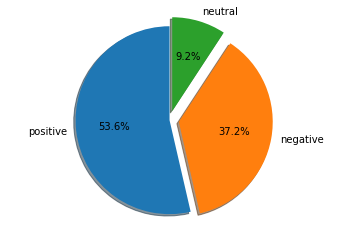

In [26]:
labels="positive","negative","neutral"
sizes=[count_0_per,count_1_per,count_11_per]
explode = (0, 0.1, 0.1)
fig,ax=plt.subplots()
ax.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()       

Text(0.5, 1.0, 'Sentiment bar chart')

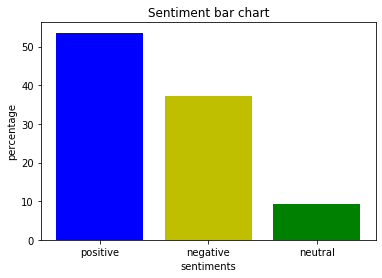

In [27]:
plt.bar(labels,sizes,align="center",alpha=1,color=["b","y","g"])
plt.ylabel('percentage')
plt.xlabel("sentiments")
plt.title('Sentiment bar chart')

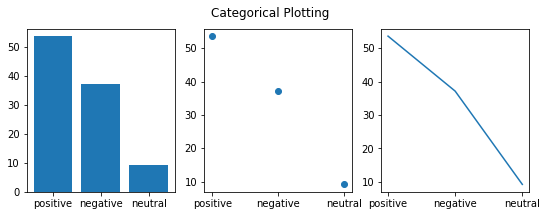

In [28]:

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(labels, sizes)
plt.subplot(132)
plt.scatter(labels, sizes)
plt.subplot(133)
plt.plot(labels, sizes)
plt.suptitle('Categorical Plotting')
plt.show()


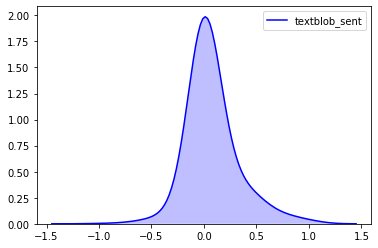

In [29]:
import seaborn as sns
for col in 'x':
    sns.kdeplot(df["textblob_sent"], shade=True,color="b",bw=.15)

In [30]:
text = " ".join(review for review in df["text"])

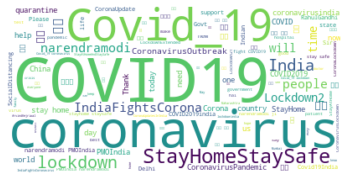

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["thi","00","ha","amp","OO","@"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

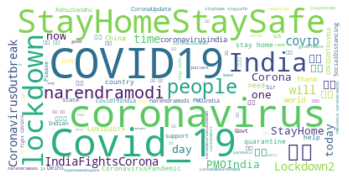

In [32]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text
